------

#  Supervised learning over patients data for predicting the disease 

The previous project was about <i>data understanding</i> and <i>data preparation</i>, which formed the basis for the modeling phase of the data mining process. Many modeling techniques make assumptions about data so the exploration and preparation phases can't be ignored. Now, as I have checked the validity of data and familiarized myself with it, I will move on to the next stage of the Cross-Industry Standard Process for Data Mining (CRISP-DM) which is <font color = darkorchid><i>modeling</i></font>.

The points below will be addressed that

- What kind of model architecture best fits our data?
- How well does the model perform technically?
- Could we improve that performance?
- How the performance of the model is evaluated?

The machine learning algorithms aim to learn from data to make predictions. The two main branches of it are <i>supervised learning</i> and <i>unsupervised learning</i>.  In this project, I am going to use the former -- <font color = darkorchid><i>supervised learning</i></font> -- for classification and regression tasks.


### Importing **all** liberaries needed for the project:



In [24]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm


# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Ridge

# Show the plots inline in the notebook
%matplotlib inline

______________
## <font color = lightcoral>1. Classification using k-nearest neighbors </font> 

I start exploring the world of data modeling by using <font color = darkorchid><b>K-Nearest Neightbors (k-NN) algorithm</b></font>. The k-NN algorithm is one of the classic supervised machine learning algorithms. It assumes that similar points are close to each other. 

In this case, I'll use the k-NN algorithm to **predict the presence of cardiovascular disease** using all the other variables as <font color = darkorchid><b>features</b></font> in the given data set. So, the target variable is <font color = darkorchid><b>cardio</b></font>.


*** 1 A)*** 

First I am dragging the data to this plateform and then printing out the first 10 rows to check that everything is ok with the created dataframe.


In [11]:

# Path for the data
data_path = 'cardio_data.csv.csv'

# Create a dataframe
cardio_data = pd.read_csv(data_path)

In [12]:
### Code - 10 first row

cardio_data.head(10)

,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_at_risk,cholesterol_elevated,cholesterol_normal,gluc_at_risk,gluc_elevated,gluc_normal
0,22767,0,162,75,120,80,0,0,1,0,0,0,1,0,0,1
1,19102,0,164,80,140,90,0,0,1,0,0,0,1,0,0,1
2,23251,0,155,76,130,80,0,0,1,0,0,0,1,0,1,0
3,22651,1,169,65,120,80,0,0,1,0,0,0,1,0,0,1
4,21770,1,171,67,160,100,0,0,0,1,0,0,1,0,0,1
5,14651,1,170,70,120,80,0,0,1,0,0,0,1,0,0,1
6,17391,0,152,65,110,70,0,0,1,0,0,0,1,0,0,1
7,14792,0,165,65,120,70,0,0,1,0,0,0,1,0,0,1
8,15982,1,180,81,110,70,1,0,1,0,0,0,1,0,0,1
9,19589,0,156,60,120,90,0,0,1,0,0,0,1,0,0,1


----

I have the data so let's make use of it. 

To teach the k-NN algorithm (or any kind of machine learning algorithm) to recognize patterns, I am going to need <font color = darkorchid><b>training data</b></font>. But to test how well a model possibly learned those patterns, I'll need <font color = darkorchid><b>test data</b></font> which is new and unseen for the trained model. Keeping in mind that the test set is not shown for the model before  I am actually done with training. 

So, to **find the estimate for the performance of a model**, I am going to use this <font color = darkorchid><b>train-test split</b></font>. "Split" because I literally split the data into two sets.

Sometimes <font color = darkorchid>stratification</font> needs to be considered. It can be used to ensure that train and test sets contain the same proportions of samples of each target class as the original data set.

*** 1 B)*** 

Gathering the features as an array `features`, and the target variable as an array `labels`. Producing training and test data.  Dividing the data **randomly** into training (80%) and test (20%) sets.


In [13]:
### Code - Train-test split
X_train, X_test, y_train, y_test = train_test_split(cardio_data.drop(['cardio'], axis=1), cardio_data['cardio'], train_size=0.8, stratify=cardio_data['cardio'])


It is good to split the dataset into train and test set so that the lable distribution should be same. This is termed as strafication. 

----------

***1 C)*** 

Scaling the numeric features. 


In [14]:
###  - Standardization

numeric_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

s_s = StandardScaler()
X_train[numeric_features] = s_s.fit_transform(X_train[numeric_features])
X_test[numeric_features] = s_s.transform(X_test[numeric_features])

<font color = red>  Why standardization? 

*    KNN algorithm relies on majority voting based on class membership of 'k' nearest samples for a given test point, the proximity of samples is naturally based on euclidean distance.
*   All nearest neighbors will be parallel in the direction of the axis with the smaller range directing to incorrect classification.

***

-------
The time to train the model has come now!

*** 1 D)*** 

Training a k-NN model with $k=3$. Printing out the confusion matrix.


In [6]:
### Code - kNN classifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

from sklearn.metrics import classification_report

y_hat = model.predict(X_test)
print(classification_report(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       143
           1       0.54      0.54      0.54        57

    accuracy                           0.74       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.74      0.74      0.74       200



100%|██████████| 1000/1000 [00:32<00:00, 30.99it/s]


(array([  1.,   1.,   7.,  82., 174., 302., 277., 129.,  24.,   3.]),
 array([0.64  , 0.6605, 0.681 , 0.7015, 0.722 , 0.7425, 0.763 , 0.7835,
        0.804 , 0.8245, 0.845 ]),
 <BarContainer object of 10 artists>)

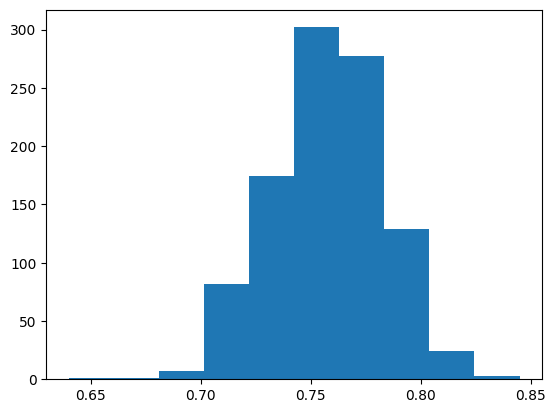

In [25]:
### 1000 different train-test-splits
scores = []

for i in tqdm(range(1000)):

    X_train, X_test, y_train, y_test = train_test_split(cardio_data.drop(['cardio'], axis=1), cardio_data['cardio'], train_size=0.8, stratify=cardio_data['cardio'])

    numeric_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

    s_s = StandardScaler()
    X_train[numeric_features] = s_s.fit_transform(X_train[numeric_features])
    X_test[numeric_features] = s_s.transform(X_test[numeric_features])

    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)

    scores.append(model.score(X_test, y_test))

plt.hist(scores)

<font color = red> 

A little variation  in accuracy is observed in the model after training it using various distribution although splitting it using strafication. The accuracy of model is nearly around 0.76



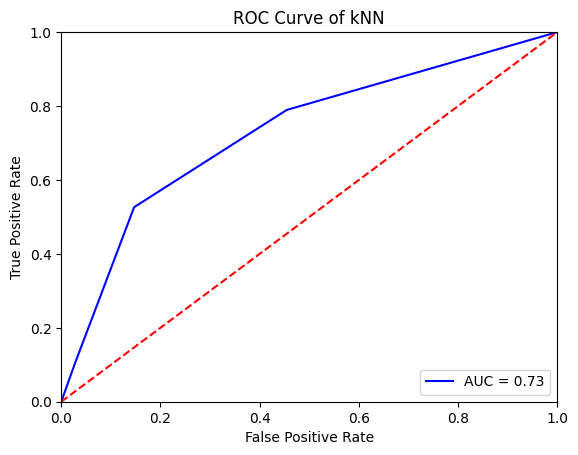

In [26]:
### AUROC and ROC Curves

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_scores = model.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

__________
## <font color = royalblue> 2. Classification accuracy using leave-one-out cross validation




 ***2 A)***


<font color = red> 

    
The difference between train test split and leave-one-out cross validation is that in leave-one-out cross validation we only leave one example in test set and we always put one example randomly. In this way it provides model that is less biased.

---------------

***2 B)***

Let's predict once again the **presence of cardiovascular disease** using all the other variables in the dataset as features. Now, use leave-one-out cross validation to estimate the model performance. Again, use a kNN classifier with $k=3$.


In [27]:
###  Leave-one-out cross validation

from numpy import mean
from numpy import std

cv = LeaveOneOut()

model = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.752 (0.432)


<font color = red> 
    
We got a model with accuracy that should not be overfitting and tested on every example.    

____________
## <font color = forestgreen> 3. Model selection with leave-one-out cross validation

So far, I've trained one model at a time and I've given the value of k. Accuracy is what it is (no spoilers here), but could we still do a little better? Let's try that by <font color = darkorchid><b>hyperparameter tuning</b></font>.

This time, I am going to train multiple models, let's say 30, and choose the best K-Nearest Neighbors model among the others. Almost all models have some parameters that need to be chosen. As does the k-NN, I just happened to choose the k value of 3. K-NN has many other hyperparameters too, but for the sake of simplicity, this time I'll focus only on the nearest neighbors. 

Now, I am supposed to find that *optimal value* for k.


Repeating the model performance estimation with values $k=1...30$ using again leave-one-out cross validation.


In [28]:
### Select best k

best_model = 0
max_mean = 0
best_k = 0
for k in tqdm(range(1,31)):

    cv = LeaveOneOut()

    model = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    
    if mean(scores) > max_mean: 
        max_mean = mean(scores)
        best_model = model
        best_k = k
print()
print('Best Accuracy with k = {} is {}'.format(best_k ,mean(scores)))

100%|██████████| 30/30 [01:24<00:00,  2.83s/it]


Best Accuracy with k = 27 is 0.7725


<font color = red> 
    
I am chaning the value from 1-30 and evaluate the model using leave out cross validaiton and choosing the model with highest scores model. The choosen model seems to perform very well enough on data whichis unseen, because it has been trained on leave one cross validation.

________________
## <font color = blue>  4. Testing with training data 



In [11]:
###  Train with whole data

best_model = 0
max_mean = 0
best_k = 0
scores = []
for k in tqdm(range(1,31)):

    model = KNeighborsClassifier(n_neighbors=k)

    model.fit(cardio_data.drop(['cardio'], axis=1), cardio_data['cardio'])

    score = model.score(cardio_data.drop(['cardio'], axis=1), cardio_data['cardio'])
    scores.append(score)
    if score > max_mean: 
        max_mean = score
        best_model = model
        best_k = k

best_model_pre = best_model
print()
print(scores)
print('Best Accuracy with k = {} is {}'.format(best_k ,mean(scores)))

100%|██████████████████████████████████████████| 30/30 [00:02<00:00, 13.29it/s]


[1.0, 0.826, 0.823, 0.788, 0.793, 0.776, 0.778, 0.755, 0.758, 0.748, 0.754, 0.743, 0.75, 0.741, 0.74, 0.731, 0.726, 0.724, 0.726, 0.725, 0.726, 0.726, 0.727, 0.722, 0.726, 0.722, 0.726, 0.725, 0.729, 0.73]
Best Accuracy with k = 1 is 0.7554666666666667


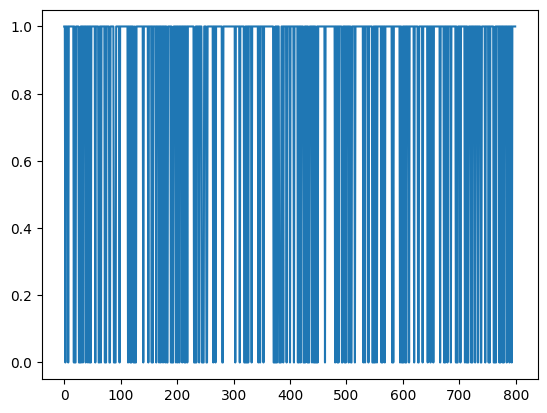

In [29]:
###  - Plot results

plt.plot(scores)

 <font color = red> 
The test set allows you to compare different models in an unbiased way, by basing  comparisons in data that were not use in any part of  training/hyperparameter selection process.